This notebook processes the UV-vis data from 9/8/24 (Batch 5) of Spincoated P3HT in DCB on PDMS.
There are two samples (S5 and S6)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_polarized_UVvis(_df, bw=None, ylim=(0,1.05),title="", plot_transmittance = False):
    # Set up figure with 3 subplots for polarized and unpolarized UV-vis data
    fig, axs = plt.subplots(3, 1, figsize=(8, 10))
    fig.suptitle(title, fontsize=16, fontweight='bold')

    if plot_transmittance:
        for i, column in enumerate([col for col in _df.columns if 'Wavelength' not in col]):
            print(column)
            _df[column] = AtoT(_df[column].values)
        _df
    # Generate colors for plotting
    colors = cm.Spectral([i / ((_df.shape[1] - 3)//3) for i in range((_df.shape[1] - 1)//3)])
    # Plot Vertical Absorbance (columns with 'H' wichic are parrallel to strain)
    for i, column in enumerate([col for col in _df.columns if 'H' in col and 'baseline' not in col]):
        axs[0].plot(_df['Wavelength'],_df[column], label=column, color=colors[i])

    axs[0].set_title(f'{'Transmittance' if plot_transmittance else 'Absorbance'} vs. Wavelength for ||-polarized light')
    axs[0].set_xlabel('Wavelength (nm)')
    axs[0].set_ylabel(f'{'Transmittance' if plot_transmittance else 'Absorbance'}')
    axs[0].set_xlim(bw)
    axs[0].set_ylim(ylim)
    axs[0].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot Horizontal Absorbance (columns with 'V' which are perp to strain)
    for i, column in enumerate([col for col in _df.columns if 'V' in col and 'baseline' not in col]):
        axs[1].plot(_df['Wavelength'],_df[column], label=column, color=colors[i])

    axs[1].set_title(f'{'Transmittance' if plot_transmittance else 'Absorbance'} vs. Wavelength for ⊥-polarized light')
    axs[1].set_xlabel('Wavelength (nm)')
    axs[1].set_ylabel(f'{'Transmittance' if plot_transmittance else 'Absorbance'}')
    axs[1].set_xlim(bw)
    axs[1].set_ylim(ylim)
    axs[1].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot Unpolarized Absorbance (columns without 'H' or 'V')
    for i, column in enumerate([col for col in _df.columns if 'H' not in col and 'V' not in col and 'Wavelength' not in col and 'baseline' not in col]):
        axs[2].plot(_df['Wavelength'], _df[column], label=column, color=colors[i])

    axs[2].set_title(f'{'Transmittance' if plot_transmittance else 'Absorbance'} vs. Wavelength for Unpolarized light')
    axs[2].set_xlabel('Wavelength (nm)')
    axs[2].set_ylabel(f'{'Transmittance' if plot_transmittance else 'Absorbance'}')
    axs[2].set_xlim(bw)
    axs[2].set_ylim(ylim)
    axs[2].legend(title='Unpolarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    
    return fig,axs
    
    # plt.show()


In [2]:
def TtoA(T):
    return -np.log10(T) 
    
def AtoT(A):
    return 10**(-A)

In [3]:

# Load the CSV file into a pandas DataFrame, with metadata
sample_info = [
    {
        'file_path': 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 5 Raw Data.csv',
        's_num': 5,
        'date_str': "2024-09-08",
        'method_str': "spincoated",
        'material_str': 'P3HT',
        'solvent_str': 'DCB'
    },
    {
        'file_path': 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 6 Raw Data.csv',
        's_num': 6,
        'date_str': "2024-09-08",
        'method_str': "spincoated",
        'material_str': "P3HT",
        'solvent_str': 'DCB'
    }
]

i=0
file_path = sample_info[i]['file_path']
s_num = sample_info[i]['s_num']
date_str = sample_info[i]['date_str']
method_str = sample_info[i]['method_str']
material_str = sample_info[i]['material_str']
    
print(f"File Path: {file_path}\n Sample Number: {s_num}\n Date: {date_str}\n Method: {method_str}")

# file_path = 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 5 Raw Data.csv'; s_num = 5; date_str = "2024-09-08"; method_str="spincoated"
# # file_path = 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 6 Raw Data.csv'; s_num = 6; date_str = "2024-09-08"; method_str="spincoated"

raw_df = pd.read_csv(file_path)

File Path: Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 5 Raw Data.csv
 Sample Number: 5
 Date: 2024-09-08
 Method: spincoated


In [4]:
### load baseline data for polaizer  ####
h_file = "baselines/Polarized Batch 4 0% Samples  - Baseline Horizontal.csv"
v_file = "baselines/Polarized Batch 4 0% Samples  - Baseline Vertical.csv"

df_h = pd.read_csv(h_file)
df_v = pd.read_csv(v_file)

#add baseleine to df
raw_df['V_baseline'] = df_v['Average']
raw_df['H_baseline'] = df_h['Average']

raw_df

,Wavelength,0%,0%H,0%V,10%,10%H,10%V,20%,20%H,20%V,30%,30%H,30%V,V_baseline,H_baseline
0,300.0,0.207481,3.964294,3.814398,0.199845,4.000000,4.000000,0.197765,3.900951,4.000000,0.198394,4.000000,3.956099,4.000000,4.000000
1,300.5,0.206436,3.925951,3.883419,0.198816,3.978060,4.000000,0.196824,3.940001,3.978052,0.197359,4.000000,3.977175,3.973701,4.000000
2,301.0,0.205409,4.000000,3.967315,0.197741,3.983123,3.934429,0.195763,3.938575,3.916744,0.196380,3.941088,4.000000,3.994414,3.992867
3,301.5,0.204034,4.000000,4.000000,0.196587,3.958317,3.994425,0.194553,4.000000,3.961047,0.195174,4.000000,3.994481,3.980757,3.989014
4,302.0,0.202789,4.000000,3.970334,0.195449,3.976173,3.994171,0.193431,4.000000,4.000000,0.194044,4.000000,3.982280,4.000000,3.992784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,0.082769,0.153253,0.246045,0.083957,0.154242,0.246253,0.085763,0.156730,0.248474,0.088380,0.159231,0.250687,0.165349,0.072880
1197,898.5,0.082817,0.152816,0.245063,0.083969,0.153760,0.245212,0.085782,0.156077,0.247410,0.088408,0.158396,0.249385,0.163506,0.072257
1198,899.0,0.082954,0.151840,0.243357,0.084069,0.152884,0.243496,0.085890,0.155242,0.245611,0.088487,0.157719,0.247464,0.161557,0.071873
1199,899.5,0.083011,0.151709,0.241521,0.084119,0.152730,0.241686,0.085936,0.155145,0.243771,0.088572,0.157617,0.245747,0.159992,0.071622


Saved figure to Carlos_P3HT_9-8-24/Raw_Polarized_UVvis_S5_spincoated_P3HT_2024-09-08.pdf


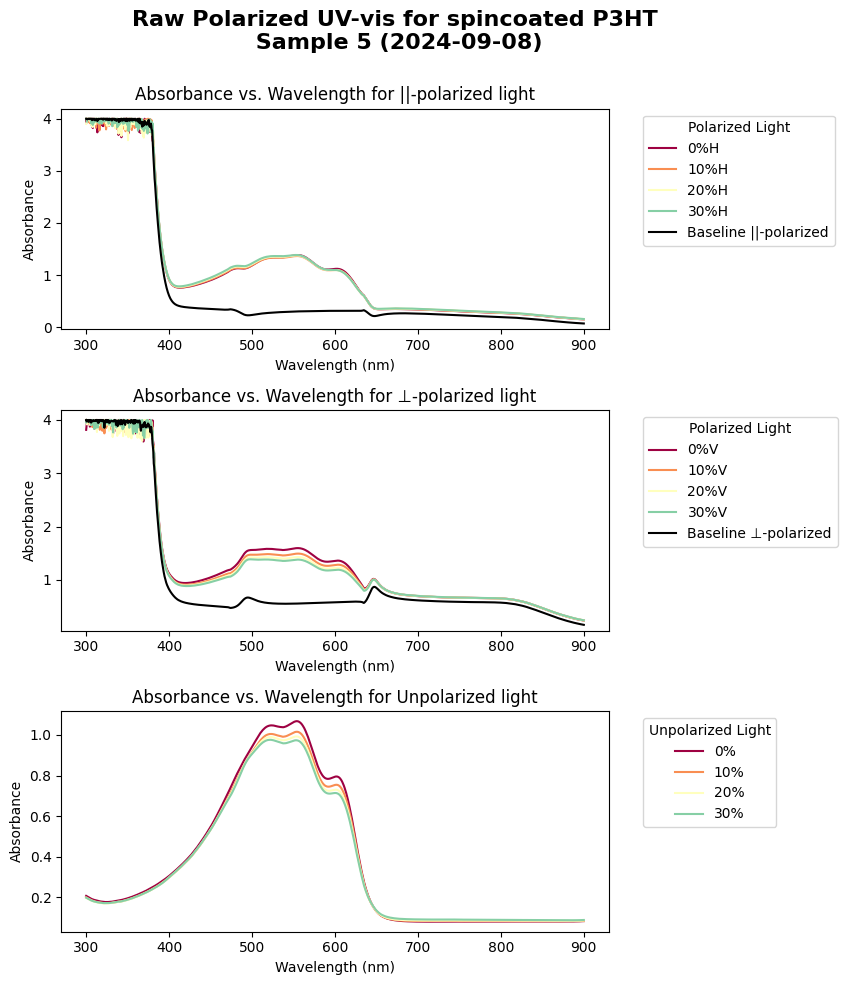

In [5]:
##### plotting the raw data #####
fig,axs = plot_polarized_UVvis(raw_df, bw=None, ylim=(None),title=f'Raw Polarized UV-vis for {method_str} {material_str}\n Sample {s_num} ({date_str})\n')
axs[0].plot(raw_df['Wavelength'], raw_df['H_baseline'], label="Baseline ||-polarized", color='k')
axs[1].plot(raw_df['Wavelength'], raw_df['V_baseline'], label="Baseline ⊥-polarized", color='k')
axs[0].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

save_str = f"Carlos_P3HT_9-8-24/Raw_Polarized_UVvis_S{s_num}_{method_str}_P3HT_{date_str}.pdf"
fig.savefig(save_str, format='pdf')
print(f"Saved figure to {save_str}")

In [6]:
#### baseline correction ####
# formula = r"$A_{\text{corrected}} = A_{\text{raw}} - A_{\text{baseline}}$"

df_corrected = raw_df.copy()
for i, column in enumerate([col for col in df_corrected.columns if 'H' in col and 'baseline' not in col]):
    df_corrected[column] = raw_df[column].values - raw_df['H_baseline'].values

for i, column in enumerate([col for col in df_corrected.columns if 'V' in col and 'baseline' not in col]):
    df_corrected[column] = raw_df[column].values - raw_df['V_baseline'].values

df_corrected

,Wavelength,0%,0%H,0%V,10%,10%H,10%V,20%,20%H,20%V,30%,30%H,30%V,V_baseline,H_baseline
0,300.0,0.207481,-0.035706,-0.185602,0.199845,0.000000,0.000000,0.197765,-0.099049,0.000000,0.198394,0.000000,-0.043901,4.000000,4.000000
1,300.5,0.206436,-0.074049,-0.090282,0.198816,-0.021940,0.026299,0.196824,-0.059999,0.004351,0.197359,0.000000,0.003474,3.973701,4.000000
2,301.0,0.205409,0.007133,-0.027099,0.197741,-0.009744,-0.059985,0.195763,-0.054292,-0.077670,0.196380,-0.051779,0.005586,3.994414,3.992867
3,301.5,0.204034,0.010986,0.019243,0.196587,-0.030697,0.013668,0.194553,0.010986,-0.019710,0.195174,0.010986,0.013724,3.980757,3.989014
4,302.0,0.202789,0.007216,-0.029666,0.195449,-0.016611,-0.005829,0.193431,0.007216,0.000000,0.194044,0.007216,-0.017720,4.000000,3.992784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,0.082769,0.080373,0.080696,0.083957,0.081362,0.080904,0.085763,0.083850,0.083125,0.088380,0.086351,0.085338,0.165349,0.072880
1197,898.5,0.082817,0.080559,0.081557,0.083969,0.081503,0.081706,0.085782,0.083820,0.083904,0.088408,0.086139,0.085879,0.163506,0.072257
1198,899.0,0.082954,0.079967,0.081800,0.084069,0.081011,0.081939,0.085890,0.083369,0.084054,0.088487,0.085846,0.085907,0.161557,0.071873
1199,899.5,0.083011,0.080087,0.081529,0.084119,0.081108,0.081694,0.085936,0.083523,0.083779,0.088572,0.085995,0.085755,0.159992,0.071622


Saved figure to Carlos_P3HT_9-8-24/Corrected_Polarized_UVvis_S5_spincoated_P3HT_2024-09-08.pdf


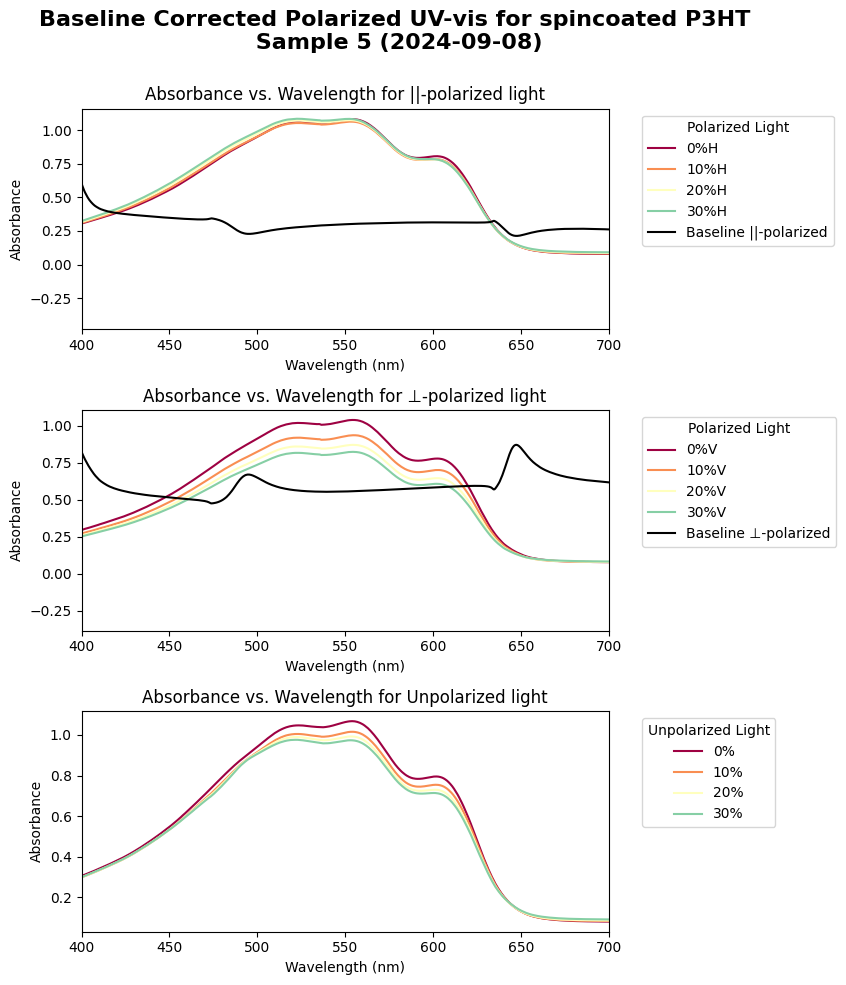

In [7]:
##### plotting final corected #####
fig,axs = plot_polarized_UVvis(df_corrected, title=f'Baseline Corrected Polarized UV-vis for {method_str} {material_str}\n Sample {s_num} ({date_str})\n', bw=(400,700), ylim = None, plot_transmittance=False)
# axs[0].text(0.75, 0.9, formula, fontsize=12, ha='center', va='center', transform=axs[0].transAxes)

#plot overides
axs[0].plot(df_corrected['Wavelength'], df_corrected['H_baseline'], label="Baseline ||-polarized", color='k')
axs[1].plot(df_corrected['Wavelength'], df_corrected['V_baseline'], label="Baseline ⊥-polarized", color='k')
axs[0].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')
# axs[2].set_ylim((.4,.8))

save_str = f"Carlos_P3HT_9-8-24/Corrected_Polarized_UVvis_S{s_num}_{method_str}_P3HT_{date_str}.pdf"
fig.savefig(save_str, format='pdf')
print(f"Saved figure to {save_str}")

In [8]:
#Save corrected data
data_save_str = f"Carlos_P3HT_9-8-24/Corrected_Polarized_UVvis_S{s_num}_{method_str}_P3HT_{date_str}.csv"
df_corrected.to_csv(data_save_str, index=False)


### Calculate the absorbance ratio

In [13]:
#load from file for modularity
peak00 = 606
peak01 = 557

df_absorbance_ratios = pd.DataFrame()

for i, sample in enumerate(sample_info):
    print(sample)
    df_corrected = pd.read_csv(sample['file_path'])

    # Get absorbance data for the peaks
    A00 = df_corrected[df_corrected['Wavelength'] == peak00]
    A01 = df_corrected[df_corrected['Wavelength'] == peak01]

    data_cols = [col for col in df_corrected.columns if col not in ['Wavelength', 'V_baseline', 'H_baseline']]    # Filter out the unwanted columns
    absorbance_ratio = A00[data_cols].values / A01[data_cols].values     # Calculate the absorbance ratio

    df_absorbance_ratio = pd.DataFrame(absorbance_ratio, columns=data_cols)
    df_absorbance_ratios = pd.concat([df_absorbance_ratios, df_absorbance_ratio], ignore_index=True)

    H_columns_str = [col for col in A00.columns if 'H' in col and 'baseline' not in col]
    V_columns_str = [col for col in A00.columns if 'V' in col and 'baseline' not in col]

    print(H_columns_str, V_columns_str)
    df.dichroic_ratio = A00[H_columns_str].values / A00[V_columns_str].values
    df.dichroic_ratio

{'file_path': 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 5 Raw Data.csv', 's_num': 5, 'date_str': '2024-09-08', 'method_str': 'spincoated', 'material_str': 'P3HT', 'solvent_str': 'DCB'}
['0%H', '10%H', '20%H', '30%H'] ['0%V', '10%V', '20%V', '30%V']
{'file_path': 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 6 Raw Data.csv', 's_num': 6, 'date_str': '2024-09-08', 'method_str': 'spincoated', 'material_str': 'P3HT', 'solvent_str': 'DCB'}
['0%H', '10%H', '20%H', '30%H', '40%H', '50%H'] ['0%V', '10%V', '20%V', '30%V', '40%V', '50%V']


In [10]:
  df_absorbance_ratios

,0%,0%H,0%V,10%,10%H,10%V,20%,20%H,20%V,30%,30%H,30%V,40%,40%H,40%V,50%,50%H,50%V
0,0.739158,0.804549,0.851287,0.737173,0.798171,0.859001,0.728752,0.788915,0.859239,0.725300,0.783575,0.860954,NaN,NaN,NaN,NaN,NaN,NaN
1,0.745469,0.784126,0.815633,0.785524,0.821711,0.855356,0.742462,0.767586,0.821279,0.743887,0.761525,0.821713,0.742369,0.75874,0.821237,0.745111,0.758781,0.820732


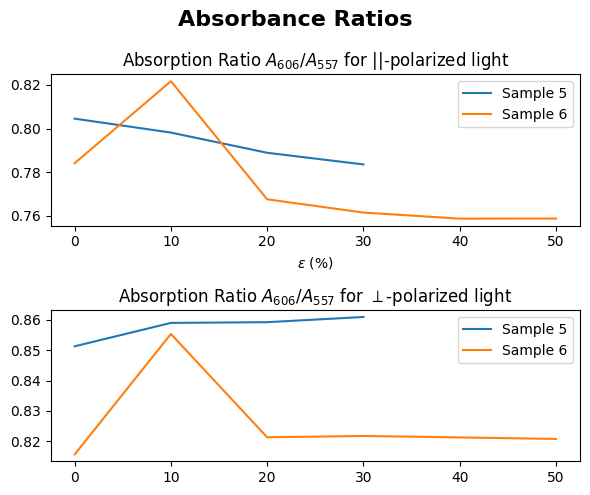

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(6, 5))
fig.suptitle("Absorbance Ratios", fontsize=16, fontweight='bold')

# Loop through each row in the DataFrame (i.e., each sample)
for i, row in df_absorbance_ratios.iterrows():
    # Find the columns with 'H' and without 'baseline'
    H_columns_str = [col for col in df_absorbance_ratios.columns if 'H' in col and 'baseline' not in col]
    H_percents = [float(s.strip('%HV')) for s in H_columns_str]
    axs[0].plot(H_percents, row[H_columns_str], label=f"Sample {sample_info[i]['s_num']}")

    V_columns_str = [col for col in df_absorbance_ratios.columns if 'V' in col and 'baseline' not in col]
    V_percents = [float(s.strip('%HV')) for s in V_columns_str]
    axs[1].plot(V_percents, row[V_columns_str], label=f"Sample {sample_info[i]['s_num']}")

    
# Add legend and show plot
axs[0].legend()
axs[0].set_title(rf'Absorption Ratio $A_{{606}}/A_{{557}}$ for ||-polarized light')
axs[1].set_title(rf'Absorption Ratio $A_{{606}}/A_{{557}}$ for ${{\perp}}$-polarized light')
axs[0].set_xlabel(r'$\epsilon$ (%)')
# axs[0].set_title(f'Dichroic Ratio $A_{{||}}/A_{{\perp}}$ for ||-polarized light')
axs[1].legend()
fig.tight_layout()

In [ ]:
### Dichroic Ratios ###
#todo